# UNAD - Analisis de datos

Estudiante: Christian Daniel Ospina Valencia

Tarea 4 - Algoritmos de Aprendizaje no Supervisado


Grupo: 202016908_51

Tutor: Handry Orozco

Noviembre 10 de 2024

### Agrupamiento en Hierarchical Clustering

### Pasos de la Actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Entrenar el modelo configurando los diferentes hiperparámetros
5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc
6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
7. Interpretar, analizar y documentar los resultados obtenido.s
8. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/

### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [49]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones


# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [50]:
# Cargar el conjunto de datos en la variable data
datos = pd.read_csv('Mall_Customers.csv')

In [51]:
datos.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [52]:
datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [53]:
# Obtener información sobre el tipo de datos y el total de valores en cada columna
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

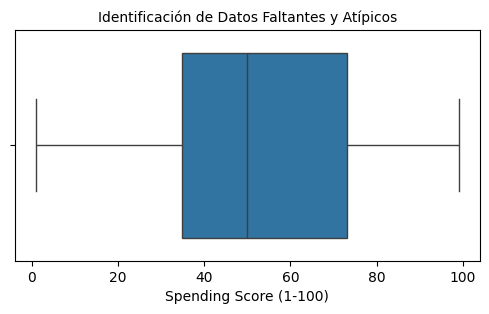

In [54]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=datos['Spending Score (1-100)']) #Recientes
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

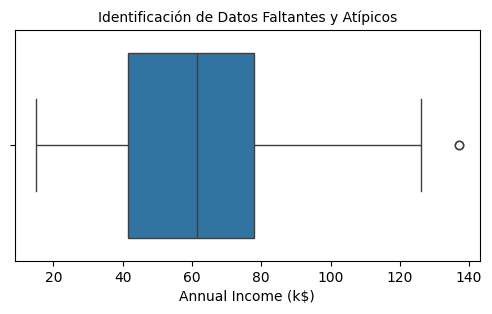

In [55]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=datos['Annual Income (k$)']) #Recientes
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [56]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Edad: ",datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Renta anual: ",datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Data Puntuacion de gasto: ",datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Renta anual:  0
Cantidad de Registros con cero en Data Puntuacion de gasto:  0


In [57]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((datos['Annual Income (k$)']<nivel_minimo)|(datos['Annual Income (k$)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 14


In [58]:
atipicos = datos[(datos['Annual Income (k$)'] < nivel_minimo) | (datos['Annual Income (k$)'] > nivel_maximo)]
print(atipicos)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
186         187  Female   54                 101                      24
187         188    Male   28                 101                      68
188         189  Female   41                 103                      17
189         190  Female   36                 103                      85
190         191  Female   34                 103                      23
191         192  Female   32                 103                      69
192         193    Male   33                 113                       8
193         194  Female   38                 113                      91
194         195  Female   47                 120                      16
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137   

In [59]:
# Filtra Datos Atípicos

Datos=datos[(datos['Annual Income (k$)']<nivel_maximo)&(datos['Annual Income (k$)']>nivel_minimo)]

In [60]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 185
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              186 non-null    int64 
 1   Gender                  186 non-null    object
 2   Age                     186 non-null    int64 
 3   Annual Income (k$)      186 non-null    int64 
 4   Spending Score (1-100)  186 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.7+ KB


### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Características de interes para el agrupamiento:

- Age
- Annual Income (k$)
- Spending Score (1-100)

In [61]:
# Filtrar columnas del modelo 

Datos = Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [66]:
# Revisión de los datos de las variables objetivo
Datos.head(40)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


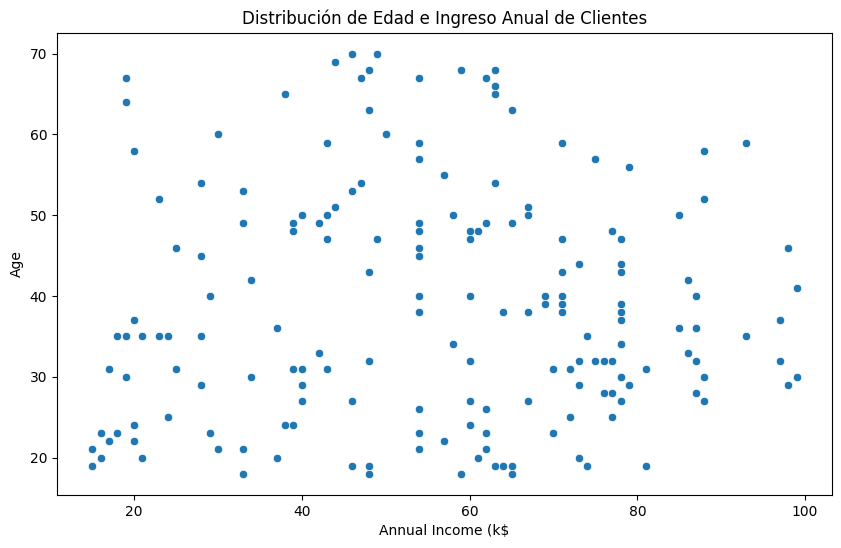

In [63]:

# Grafica antes del agrupamiento

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Datos['Annual Income (k$)'], y=Datos['Age'])
plt.title('Distribución de Edad e Ingreso Anual de Clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()

### 4. Entrenar el modelo configurando los diferentes hiperparámetros

In [68]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]])


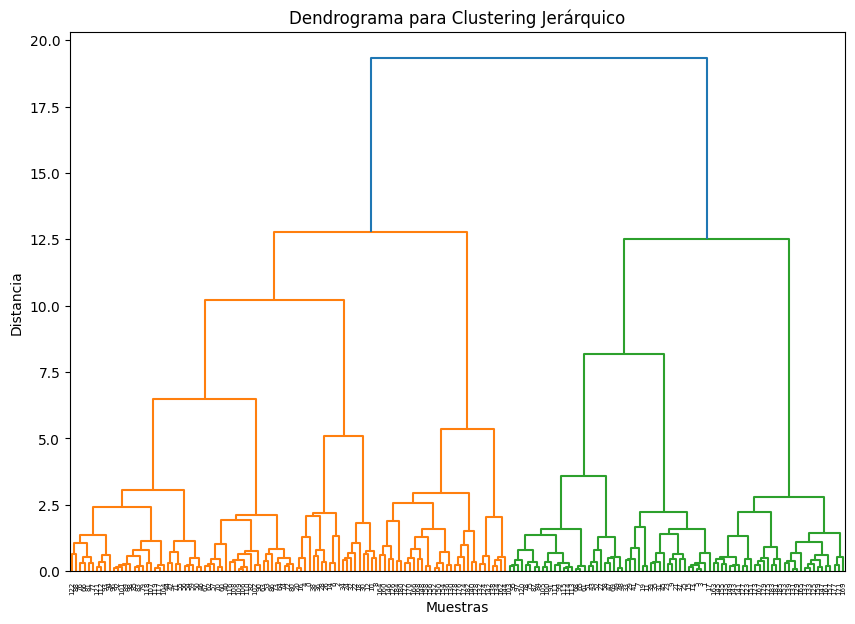

In [69]:
# Check for and handle non-finite values in scaled_data
scaled_data = np.nan_to_num(scaled_data)  # Reemplaza valores NaN, inf y -inf con valores finitos

# Continue with hierarchical clustering
linked = linkage(scaled_data, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

In [70]:
# Assuming 'Datos' is your DataFrame
# Replace NaNs with the mean of each column
Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]] = Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]].fillna(Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]].mean())

# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]])  

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.33213815748086906
Índice de Calinski-Harabasz: 84.90139875046562
Índice de Davies-Bouldin: 1.1305024940373656


### 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

- Gráfico de Dispersión para Visualización de Clusters

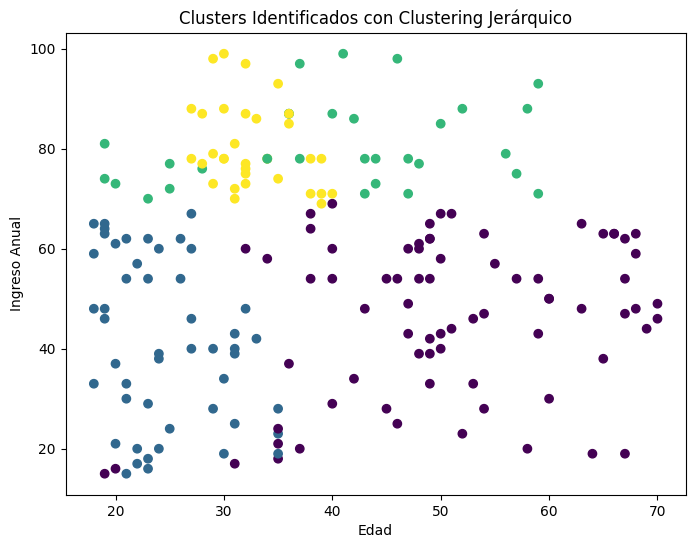

In [72]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=4)  # Ajustar el número de clusters
Datos['Cluster'] = model.fit_predict(scaled_data)
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(Datos['Age'], Datos['Annual Income (k$)'], c=Datos['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual')
plt.show()

- Gráfico de Silueta

Silhouette Score: 0.384942917114684


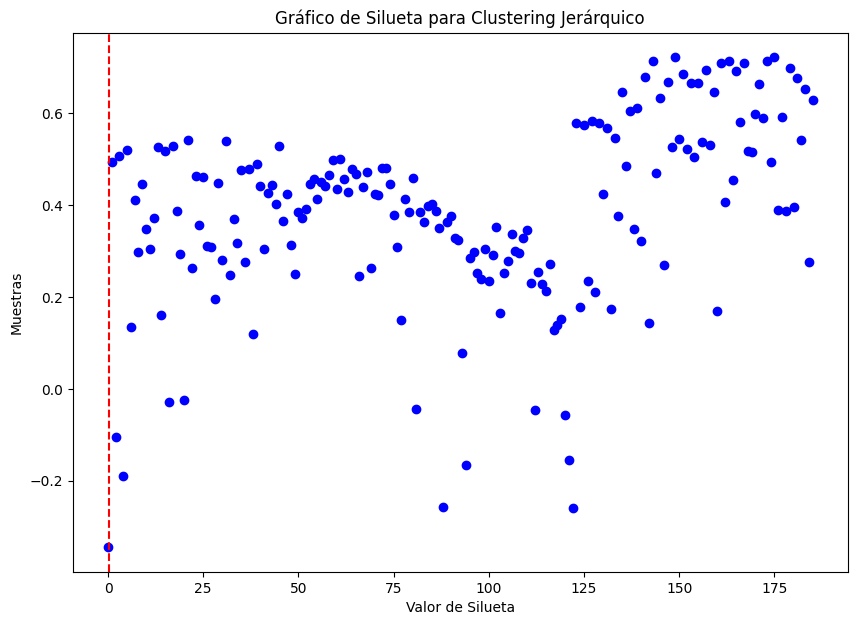

In [73]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()

### 7. Interpretar, analizar y documentar los resultados obtenidos

La edad es un factor que puede determinar los hábitos de compra y las preferencias de los consumidores.

El gráfico de silueta muestra una alta cohesión entre los clusters, indicando una buena segmentación de los datos.

El coeficiente de silueta indica una agrupación moderada, con cierta superposición entre los clusters.

El alto valor del índice de Calinski-Harabasz indica una buena separación entre los clusters.

El valor del índice de Davies-Bouldin indica que los clusters no son óptimos, pero tampoco son completamente aleatorios.